# Correlation analysis

Here we will do a correlation analysis of our original variables of our dataset. We will reuse the same code from [initial_EDA.ipynb](initial_EDA.ipynb) to import the data.

In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [6]:
def read_data(path):
    df = pd.read_excel(path, header=0)

    df.columns = df.iloc[0,:]

    df.rename(index=str, columns={"default payment next month": "Y"}, inplace=True)

    y = df.Y

    df.drop('ID', inplace=True, axis = 0)
    y.drop('ID', inplace=True, axis = 0)
    df.drop(columns = 'Y', inplace = True)
    df = df.astype('int32')
    y = y.astype('int32')
    
    #replace 'PAY_0' with 'PAY_1' in order to allign with 'BILL_AMT1' and 'PAY_AMT1'
    df.rename(index=str, columns = {'PAY_0': 'PAY_1'}, inplace=True)

    return df,  y

df, y= read_data('../default_of_credit_card_clients.xls')
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


We'll perform a correlation analysis, both Spearman and Pearson Correlation



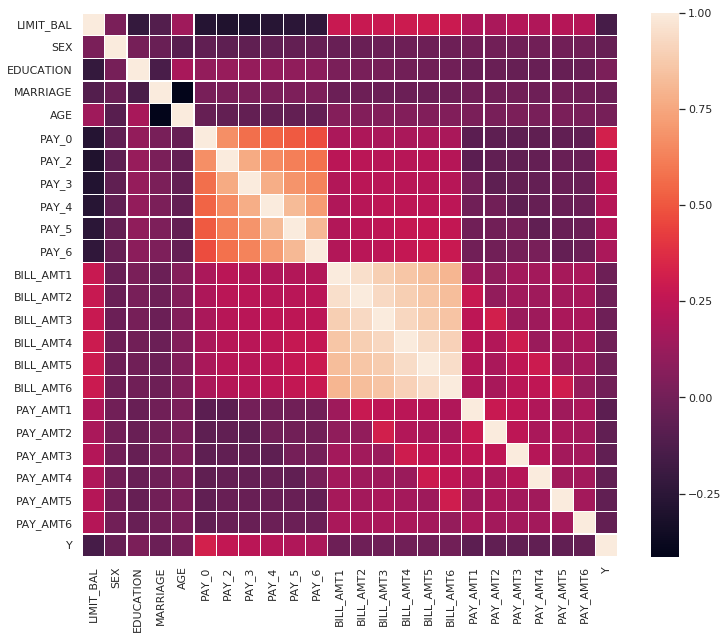

In [26]:
#start with pearson
full_df = pd.concat([df, y], axis = 1)
corr = full_df.corr(method='pearson')

#plot a heatmap to better visualize
fig = plt.figure(figsize = (12,10))
sns.heatmap(corr, linewidths=.2)

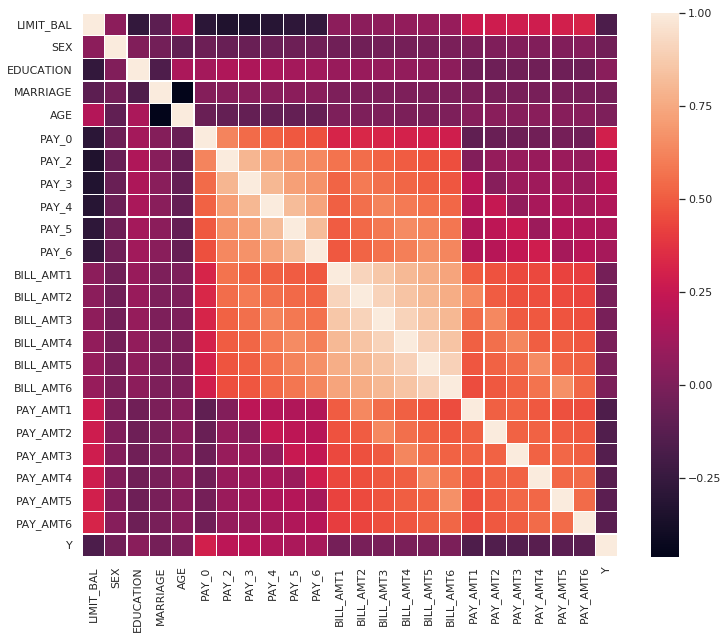

In [29]:
#Spearman Correlation
corr2 = full_df.corr(method='spearman')

#plot heatmap to better visualize
fig = plt.figure(figsize=(12,10))
ssns.heatmap(corr2, linewidths = .2)

Some Notes: many of the same groups of features are correlated with each other. For instance, the 'BILL_AMT1' : 'BILL_AMT6' features are strongly correlated with each other, both in Pearson and Spearman. This is self-explanatory; the pattern of bill amounts should be related to past history of bill amounts, and similar to the other group of features. Some features that are have a significant correlation to the target, 'Y' are 'LIMIT_BAL and some of the 'PAY_AMT' features. 

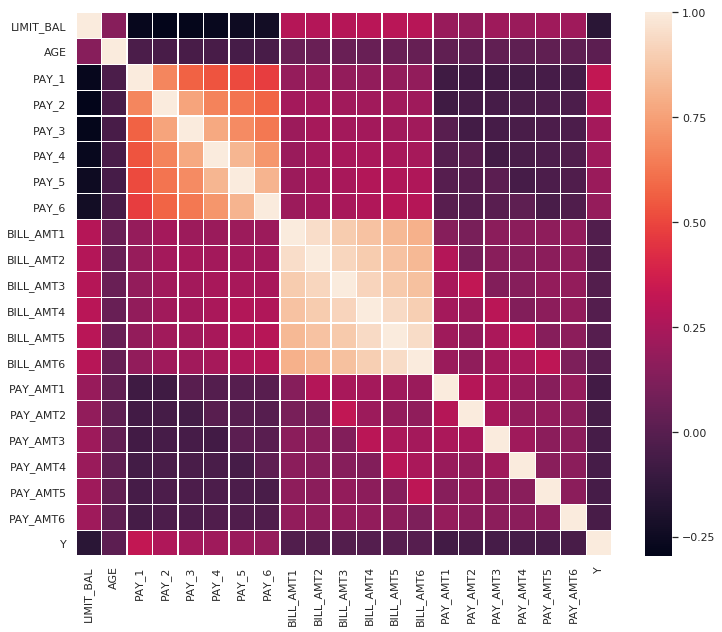

In [7]:
#change the 'EDUCATION' values
df['EDUCATION'] = df['EDUCATION'].replace({1: 'Graduate School', 2: 'University', 3: 'Other', 4: 'Other', 5: 'Other', 6: 'Other', 0: 'Other'})

#change the 'SEX' values
df['SEX'] = df['SEX'].replace({1: 'Male', 2:'Female'})

#change the 'MARRIAGE' values
df['MARRIAGE'] = df['MARRIAGE'].replace({2: 'Non-married', 1: 'Married', 3: 'Non-married', 0: 'Non-married'})


#start with pearson
full_df = pd.concat([df, y], axis = 1)
corr = full_df.corr(method='pearson')

#plot a heatmap to better visualize
fig = plt.figure(figsize = (12,10))
sns.heatmap(corr, linewidths=.2)
